In [ ]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/finalThesis/Suicide_Detection_2P3M_emptyRemoved.csv")

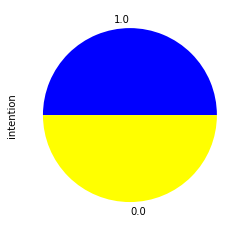

In [ ]:
count_classes = pd.value_counts(df['intention'])
count_classes.plot.pie(colors = ['blue', 'yellow'])

In [ ]:
df.head(10)

,Unnamed: 0,tweet,class,intention
0,0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1.0
1,1,Am I weird I don't get affected by compliments...,non-suicide,0.0
2,2,Finally 2020 is almost over... So I can never ...,non-suicide,0.0
3,3,i need helpjust help me im crying so hard,suicide,1.0
4,4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,1.0
5,5,Honetly idkI dont know what im even doing here...,suicide,1.0
6,6,[Trigger warning] Excuse for self inflicted bu...,suicide,1.0
7,7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,1.0
8,8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,0.0
9,9,My life is over at 20 years oldHello all. I am...,suicide,1.0


In [ ]:
df.shape

(232045, 4)

In [ ]:
df.intention.value_counts()

1.0    116032
0.0    116013
Name: intention, dtype: int64

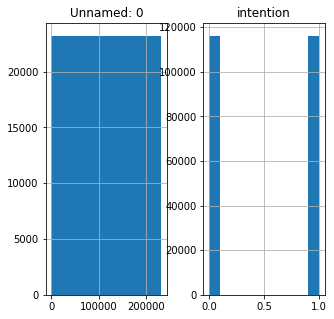

In [ ]:
df.hist(figsize=(5, 5));

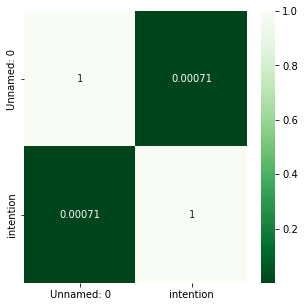

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data=df.corr(), annot=True, cmap="Greens_r")
plt.show();

In [ ]:
df_manual_testing = df.tail(100)
for i in range(232044,231944,-1):
    df.drop([i], axis = 0, inplace = True)

In [ ]:
df_manual_testing.head(10)

,Unnamed: 0,tweet,class,intention
231945,231967,i think i'm done with Shy Away lyricposting no...,non-suicide,0.0
231946,231968,I can’t believe I have to leave this out here....,non-suicide,0.0
231947,231969,Wish me luck bois A little context my whole fa...,non-suicide,0.0
231948,231970,The surprising part is the staggering depth of...,suicide,1.0
231949,231971,guys what just happened so here's what happene...,non-suicide,0.0
231950,231972,I’m done I’m not worthy of lifeForget it,suicide,1.0
231951,231973,Planning on ending itI'm not sure whether or n...,suicide,1.0
231952,231974,Do you guys think it's bad or weird to get a b...,non-suicide,0.0
231953,231975,I learned something today that will change red...,non-suicide,0.0
231954,231976,Probably goodbyeHi there\nI wish I didn't have...,suicide,1.0


In [ ]:
df_manual_testing.to_csv("/content/drive/MyDrive/finalThesis/manual_testing.csv")

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head(10)

,Unnamed: 0,tweet,class,intention
91916,91928,"If you ever dm me, I’m going to go nuts lol Wh...",non-suicide,0.0
172551,172569,My friend is having thoughts of suicide after ...,suicide,1.0
88607,88619,Asking people to lockdown indefinitely is self...,suicide,1.0
166144,166162,Tell me why I feel personally offended when my...,non-suicide,0.0
160175,160193,"not even alcohol helps now...2 days max, then ...",suicide,1.0
151472,151490,wishing all my neopronoun users a pleasant eve...,non-suicide,0.0
169502,169520,A friend of me was raped and hes girlfriend ab...,suicide,1.0
160602,160620,i’m just frustrated. everyone says there’s all...,suicide,1.0
154400,154418,I Don't what else to do.I've been having probl...,suicide,1.0
100472,100486,Suicidal bc impulses / no controlI hate myself...,suicide,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'tweet', 'class', 'intention'], dtype='object')

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["tweet"] = df["tweet"].apply(wordopt)

In [ ]:
vectorization = TfidfVectorizer()
x = vectorization.fit_transform(df["tweet"])
y = df["intention"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [ ]:
xv_train = x_train
xv_test = x_test

In [ ]:
df.columns

Index(['Unnamed: 0', 'tweet', 'class', 'intention'], dtype='object')

In [ ]:
names = ["NB", "SVM", "LR", "DT", "GBC", "RF"]

In [ ]:
scores = []
preci = []
recall = []
f1 = []

### Naive Bayes

In [ ]:
from sklearn import naive_bayes

In [ ]:
clf = naive_bayes.MultinomialNB()

In [ ]:
clf.fit(xv_train, y_train)

MultinomialNB()

In [ ]:
pred_nb=clf.predict(xv_test)

In [ ]:
clf.score(xv_test, y_test)

0.885446980965315

In [ ]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88     23275
         1.0       0.83      0.97      0.89     23114

    accuracy                           0.89     46389
   macro avg       0.90      0.89      0.88     46389
weighted avg       0.90      0.89      0.88     46389



In [ ]:
scores.append(accuracy_score(y_test, pred_nb))

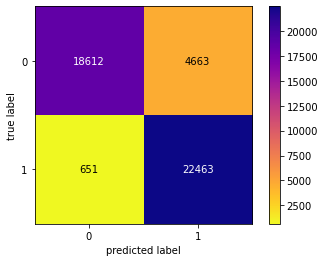

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_nb)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
preci.append(precision_score(y_test, pred_nb, average='macro'))
recall.append(recall_score(y_test, pred_nb, average='macro'))
f1.append(f1_score(y_test, pred_nb, average='macro'))

### Support Vector Machine(SVM)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
sv = svm.LinearSVC()
sv.fit(x_train, y_train)

LinearSVC()

In [ ]:
sv_pred = sv.predict(x_test)
sv.score(xv_test, y_test)

0.9401151134967342

In [ ]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     23275
         1.0       0.95      0.93      0.94     23114

    accuracy                           0.94     46389
   macro avg       0.94      0.94      0.94     46389
weighted avg       0.94      0.94      0.94     46389



In [ ]:
scores.append(accuracy_score(y_test, sv_pred))

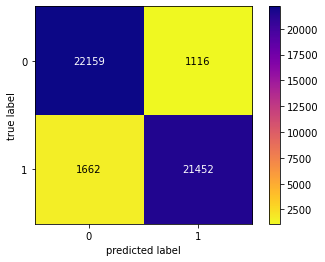

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, sv_pred)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [ ]:
preci.append(precision_score(y_test, sv_pred, average='macro'))
recall.append(recall_score(y_test, sv_pred, average='macro'))
f1.append(f1_score(y_test, sv_pred, average='macro'))

### Logistic Regression

In [ ]:
xv_train.shape

(185556, 143298)

In [ ]:
from sklearn.linear_model import LogisticRegression  

In [ ]:
LR = LogisticRegression(max_iter=10000)
LR.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(x_test, y_test)

0.9355666213973141

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94     23275
         1.0       0.95      0.92      0.93     23114

    accuracy                           0.94     46389
   macro avg       0.94      0.94      0.94     46389
weighted avg       0.94      0.94      0.94     46389



In [ ]:
scores.append(accuracy_score(y_test, pred_lr))

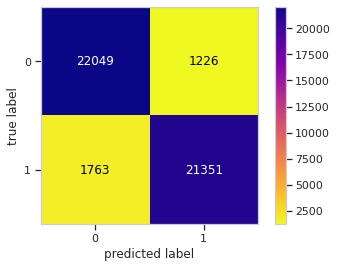

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [ ]:
preci.append(precision_score(y_test, pred_lr, average='macro'))
recall.append(recall_score(y_test, pred_lr, average='macro'))
f1.append(f1_score(y_test, pred_lr, average='macro'))

### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, pred_dt)
print(cm)

[[20057  3218]
 [ 3437 19677]]


In [ ]:
DT.score(xv_test, y_test)

0.8565392657742137

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86     23275
         1.0       0.86      0.85      0.86     23114

    accuracy                           0.86     46389
   macro avg       0.86      0.86      0.86     46389
weighted avg       0.86      0.86      0.86     46389



In [ ]:
scores.append(accuracy_score(y_test, pred_dt))

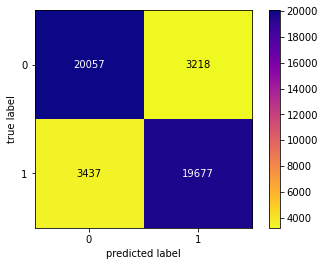

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_dt)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [ ]:
preci.append(precision_score(y_test, pred_dt, average='macro'))
recall.append(recall_score(y_test, pred_dt, average='macro'))
f1.append(f1_score(y_test, pred_dt, average='macro'))

### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.8873655392442173

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     23275
         1.0       0.92      0.85      0.88     23114

    accuracy                           0.89     46389
   macro avg       0.89      0.89      0.89     46389
weighted avg       0.89      0.89      0.89     46389



In [ ]:
scores.append(accuracy_score(y_test, pred_gbc))

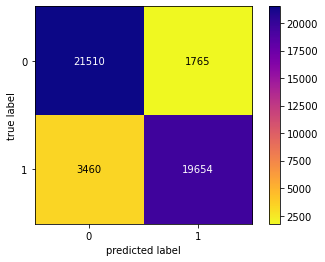

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_gbc)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [ ]:
preci.append(precision_score(y_test, pred_gbc, average='macro'))
recall.append(recall_score(y_test, pred_gbc, average='macro'))
f1.append(f1_score(y_test, pred_gbc, average='macro'))

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.8894781090344693

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     23275
         1.0       0.89      0.88      0.89     23114

    accuracy                           0.89     46389
   macro avg       0.89      0.89      0.89     46389
weighted avg       0.89      0.89      0.89     46389



In [ ]:
scores.append(accuracy_score(y_test, pred_rfc))

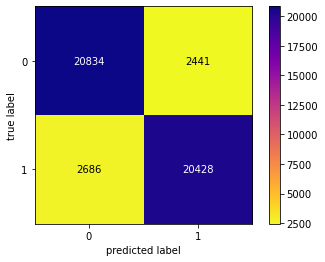

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

lr_cmat = confusion_matrix(y_test, pred_rfc)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='plasma_r', colorbar=True)
plt.show()

In [ ]:
preci.append(precision_score(y_test, pred_rfc, average='macro'))
recall.append(recall_score(y_test, pred_rfc, average='macro'))
f1.append(f1_score(y_test, pred_rfc, average='macro'))

###Calculating Output

In [ ]:
def output_lable(n):
    if n == 0:
        return "Not Suicidal"
    elif n == 1:
        return "Suicidal"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    
    pred_NB = clf.predict(new_xv_test)
    pred_SVM = sv.predict(new_xv_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nNB Prediction: {} \nSVM Prediction: {} \nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
                                                                                                              output_lable(pred_NB[0]),
                                                                                                              output_lable(pred_SVM[0]),
                                                                                                              output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

i want to kill myself


NB Prediction: Suicidal 
SVM Prediction: Suicidal 
LR Prediction: Suicidal 
DT Prediction: Suicidal 
GBC Prediction: Suicidal 
RFC Prediction: Suicidal


Results

In [ ]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,NB,88540000.000000
1,SVM,94010000.000000
2,LR,93560000.000000
3,DT,85650000.000000
4,GBC,88740000.000000
5,RF,88950000.000000


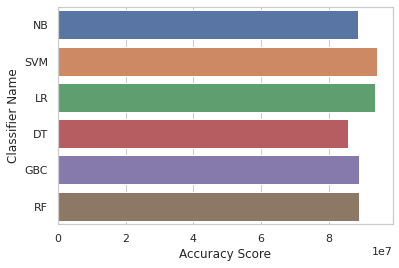

In [ ]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

ROC Curve

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
nb_probs = clf.predict_proba(x_test)
svm_probs = sv._predict_proba_lr(x_test)
lr_probs = LR.predict_proba(x_test)
dt_probs = DT.predict_proba(x_test)
gbc_probs = GBC.predict_proba(x_test)
rf_probs = RFC.predict_proba(x_test)

nb_probs = nb_probs[:, 1]
svm_probs = svm_probs[:, 1]
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
gbc_probs = gbc_probs[:, 1]
rf_probs = rf_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)

nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gbc_auc = roc_auc_score(y_test, gbc_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

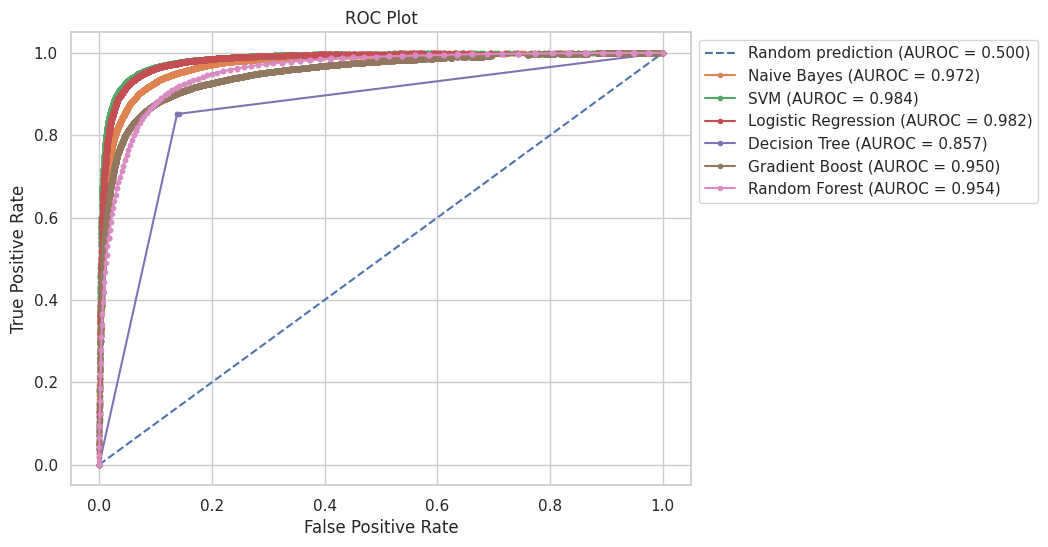

In [ ]:
figure(figsize=(8, 6), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUROC = %0.3f)' % svm_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='Gradient Boost (AUROC = %0.3f)' % gbc_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(bbox_to_anchor=(1,1), loc="upper left") # 
# Show plot
plt.show()

Precision Recall F1 Score

In [ ]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x = np.arange(len(names))
width = 0.35

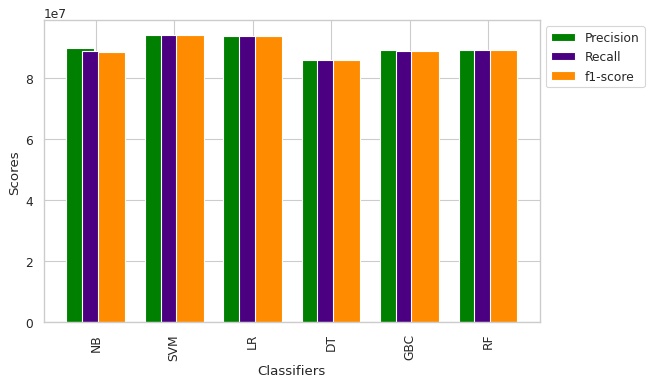

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
plt.bar(x-0.2, preci, width, color='green')
plt.bar(x, recall, width, color='indigo')
plt.bar(x+0.2, f1, width, color='darkOrange')
plt.xticks(x, names, rotation=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.legend(["Precision", "Recall", "f1-score"], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [ ]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [ ]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,NB,88540000.0,89720000.0,88570000.0,88470000.0
1,SVM,94010000.0,94040000.0,94010000.0,94010000.0
2,LR,93560000.0,93580000.0,93550000.0,93560000.0
3,DT,85650000.0,85660000.0,85650000.0,85650000.0
4,GBC,88740000.0,88950000.0,88720000.0,88720000.0
5,RF,88950000.0,88950000.0,88950000.0,88950000.0
